# Fake News Classification: Model Results Summary

Generate presentation-ready charts and analysis from saved model results.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Import model evaluation functions
from model_eval import (
    load_all_model_results,
    plot_best_models_comparison,
    plot_model_accuracy_comparison,
    generate_presentation_summary,
    create_model_performance_table
)

print('Libraries imported successfully!')

Libraries imported successfully!


In [2]:
# Load all saved model results
print('Loading model results...')
models = load_all_model_results()

if models:
    print(f'Loaded {len(models)} model results')
    for model_id, data in models.items():
        name = data.get('display_name', model_id)
        acc = data.get('accuracy', 0) * 100
        print(f'  {name}: {acc:.2f}% accuracy')
else:
    print('No model results found. Run individual notebooks first.')

Loading model results...
Loaded 5 model results
Loaded 5 model results
  Full BERT Fine-tuned: 98.71% accuracy
  Universal Sentence Encoder + Logistic Regression: 92.45% accuracy
  Baseline LogisticRegression: 92.90% accuracy
  Simple BERT: 95.87% accuracy
  GloVe + Pooling + Logistic Regression: 88.96% accuracy


Generating executive summary chart...


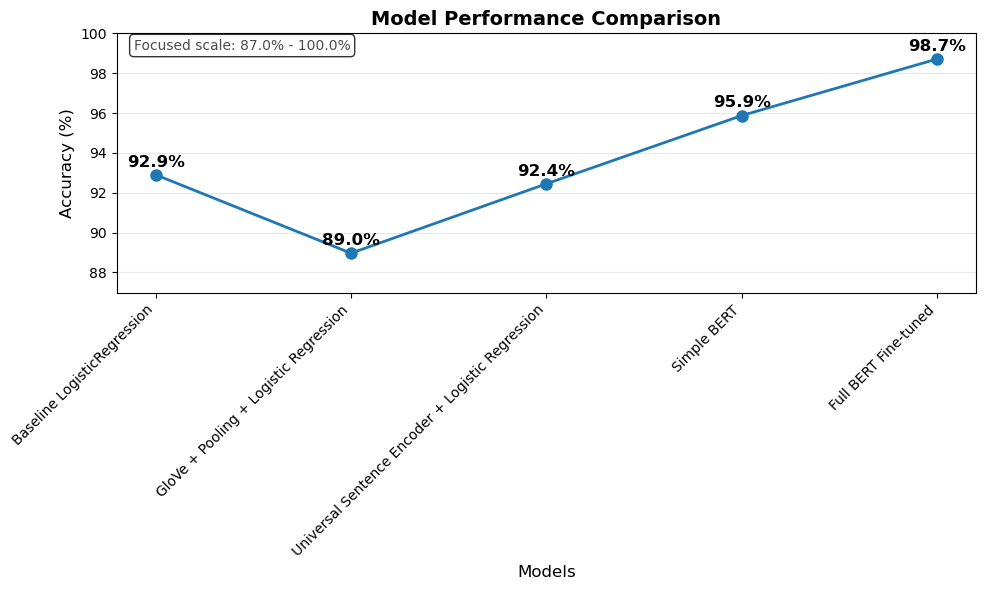

Chart saved to presentation_assets/executive_summary.png
Y-axis range: 87.0% - 100.0% (Range: 13.0 percentage points)


In [3]:
# Generate executive summary chart (line chart)
desired_order = [
    "baseline_lr",
    "Model6a_GloVe_Pooling_LR",
    "Model6a_USE_LR",
    "simple_bert",
    "full_bert_finetuned"
]
if models:
    print('Generating executive summary chart...')
    plot_best_models_comparison(models, 'presentation_assets/executive_summary.png', chart_type='line', order=desired_order)
else:
    print('Cannot generate chart - no results available')

Generating model comparison chart...


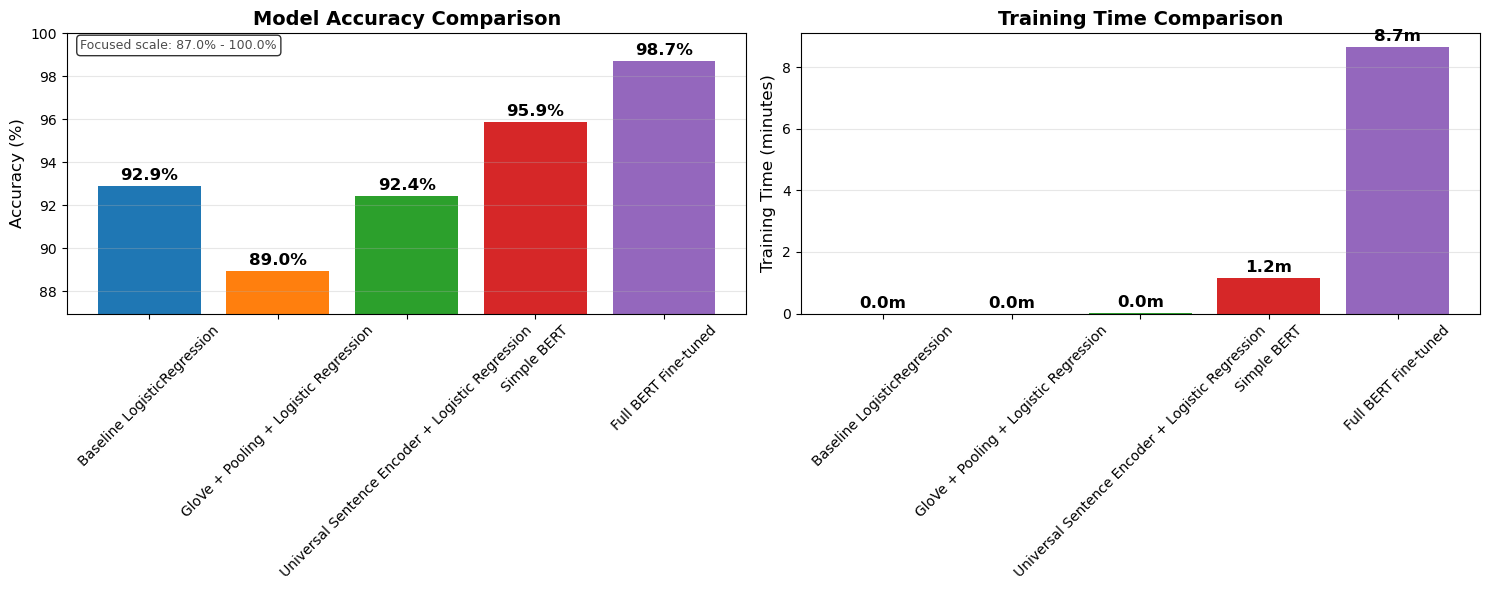

Chart saved to presentation_assets/model_comparison.png
Accuracy y-axis range: 87.0% - 100.0% (Range: 13.0 percentage points)


In [4]:
# Generate detailed comparison
if models:
    print('Generating model comparison chart...')
    plot_model_accuracy_comparison(models, 'presentation_assets/model_comparison.png',order=desired_order)
else:
    print('Cannot generate chart - no results available')

In [5]:
# Generate presentation summary
if models:
    summary = generate_presentation_summary(models)
    print('PRESENTATION SUMMARY')
    print('='*50)
    print(f'Best Model: {summary.get("best_model_name", "Unknown")}')
    print(f'Best Accuracy: {summary.get("best_accuracy", "Unknown")}')
    print(f'Models Tested: {summary.get("total_models_tested", 0)}')
else:
    print('Cannot generate summary - no results available')

PRESENTATION SUMMARY
Best Model: Full BERT Fine-tuned
Best Accuracy: 98.71%
Models Tested: 5


In [6]:
# Generate performance table
if models:
    table = create_model_performance_table(models, order=desired_order)
    print('PERFORMANCE TABLE FOR README')
    print('='*50)
    print(table)
    
    # Save to file
    Path('presentation_assets').mkdir(exist_ok=True)
    with open('presentation_assets/performance_table.md', 'w') as f:
        f.write(table)
    print('Table saved to presentation_assets/performance_table.md')
else:
    print('Cannot generate table - no results available')

PERFORMANCE TABLE FOR README
| Model | Accuracy | Training Time | Architecture/Setup |
|-------|----------|---------------|-------------|
| Baseline LogisticRegression | 92.90% | 0.0 min | LogisticRegression with CountVectorizer (10k features) |
| GloVe + Pooling + Logistic Regression | 88.96% | 0.0 min | Logistic Regression with GloVe-6B-100d embeddings (400K vocab) and mean pooling |
| Universal Sentence Encoder + Logistic Regression | 92.45% | 0.0 min | Logistic Regression with Universal Sentence Encoder embeddings (512-dim) |
| Simple BERT | 95.87% | 1.2 min | Frozen BERT + LogisticRegression (768 features) |
| Full BERT Fine-tuned | 98.71% | 8.7 min | BERT-base-uncased fine-tuned (109,483,778 parameters) |

Table saved to presentation_assets/performance_table.md
